In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv(r"D:\ML\3-Regression\Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
# Dropping day, month and year as we don't require that
df.drop(['day','month','year'],axis=1,inplace=True)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df['Classes'].value_counts()

Classes
fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [14]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    int64  
 11  Region       244 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 23.0 KB


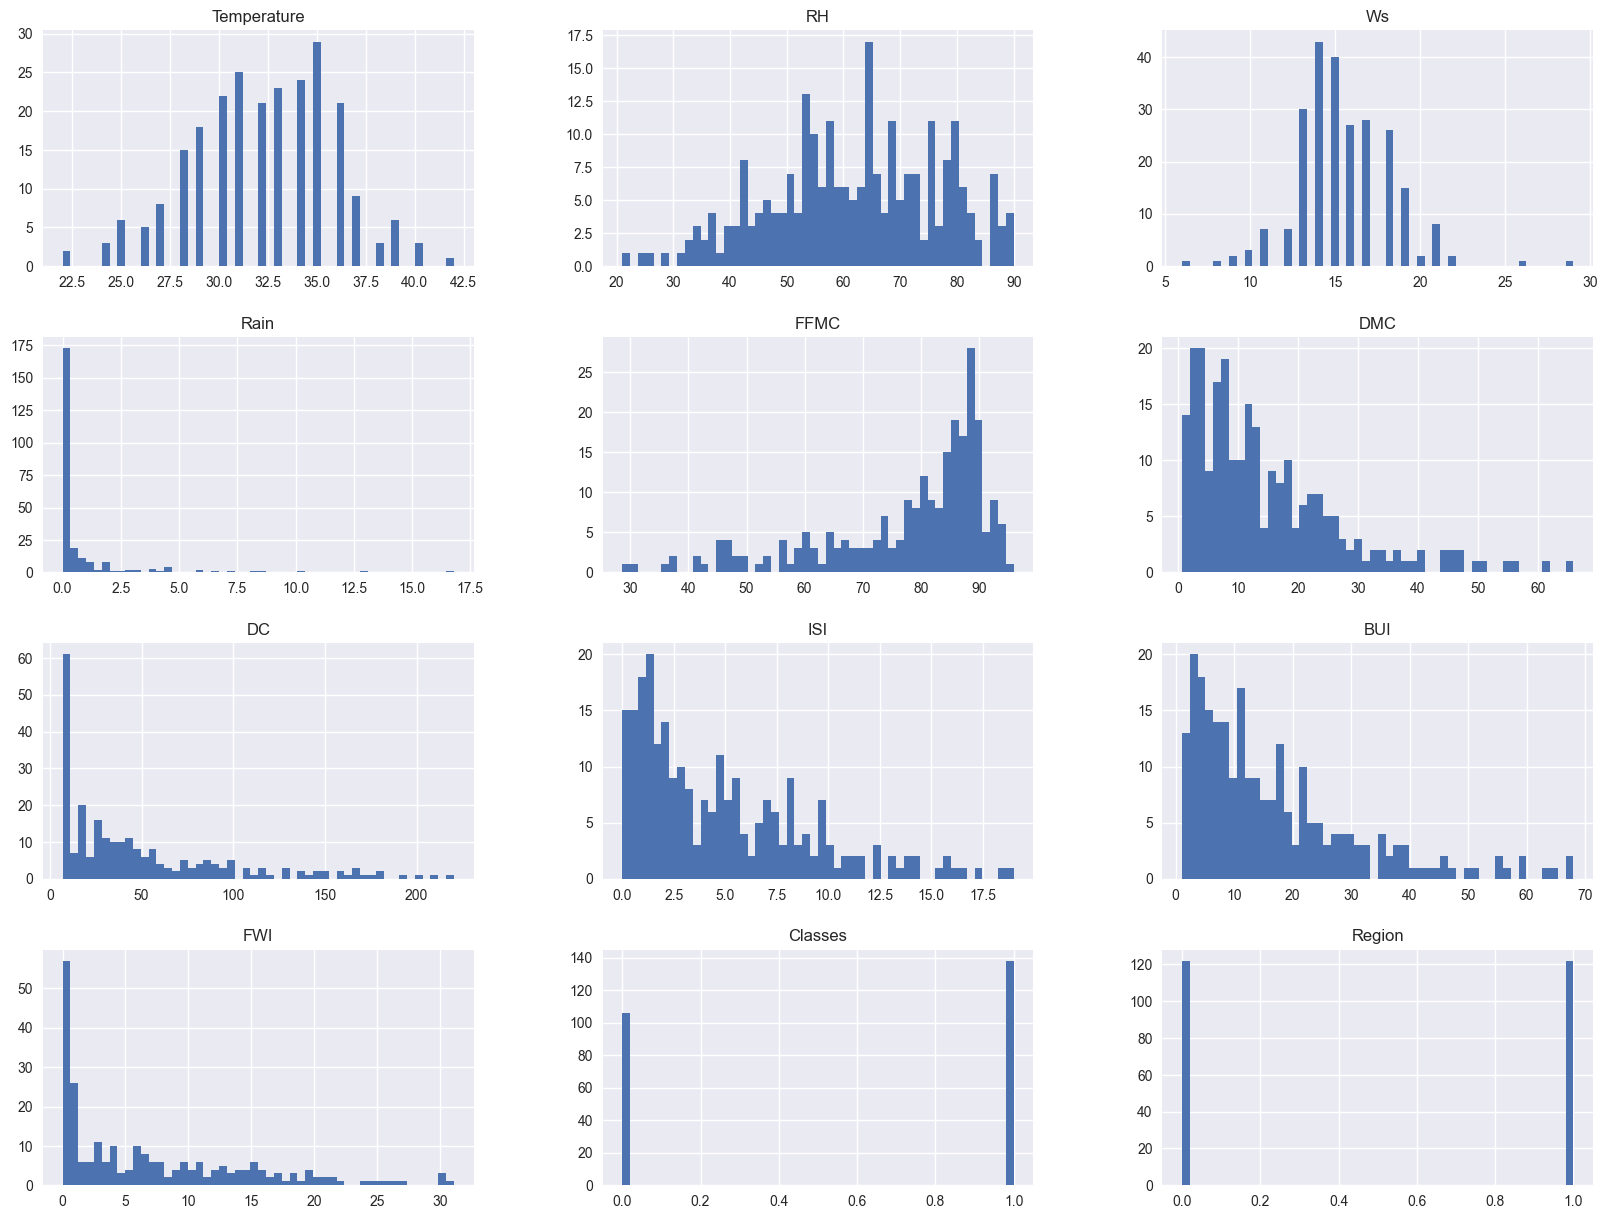

In [17]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

([<matplotlib.patches.Wedge at 0x14f551bf500>,
 [Text(-0.22500729230969246, 1.0767412495151567, ''),
  Text(0.22500725808384633, -1.0767412566673527, '')],
 [Text(-0.12273125035074132, 0.587313408826449, '56.6%'),
  Text(0.12273123168209799, -0.5873134127276468, '43.4%')])

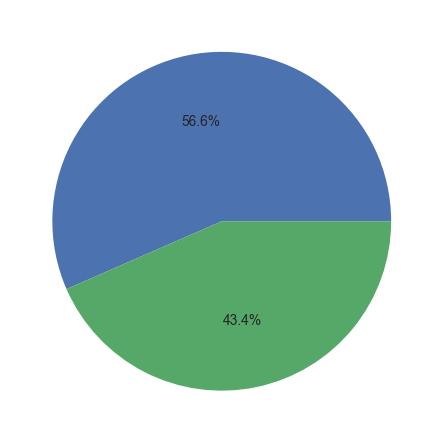

In [20]:
# Percentafe for Pie chart
plt.pie(df['Classes'].value_counts(),autopct='%1.1f%%')

In [21]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.568998,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.583416,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.036005,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324852,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.692042,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.873319,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.734034,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922187,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.853900,0.583882,0.087370
FWI,0.568998,-0.583416,0.036005,-0.324852,0.692042,0.873319,0.734034,0.922187,0.853900,1.000000,0.720222,0.200494


<Axes: >

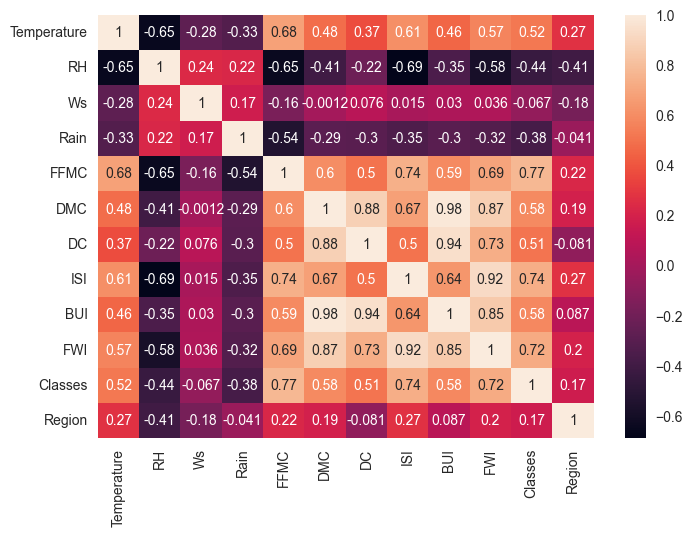

In [22]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Temperature'>

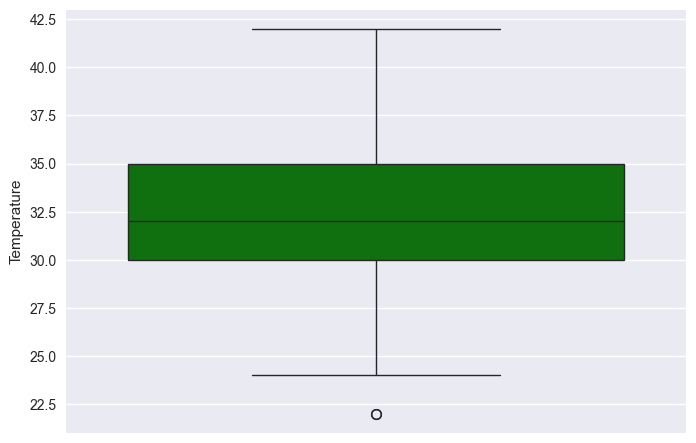

In [24]:
sns.boxplot(df['Temperature'],color='green')

In [25]:
# Segregating Dependent and independent features
X = df.drop(['FWI'],axis=1)
y = df['FWI']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [35]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [36]:
# Dropping BUI AND DC:
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)
X_train.shape, X_test.shape

((195, 9), (49, 9))

In [37]:
# Feature Scaling or Stanadardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

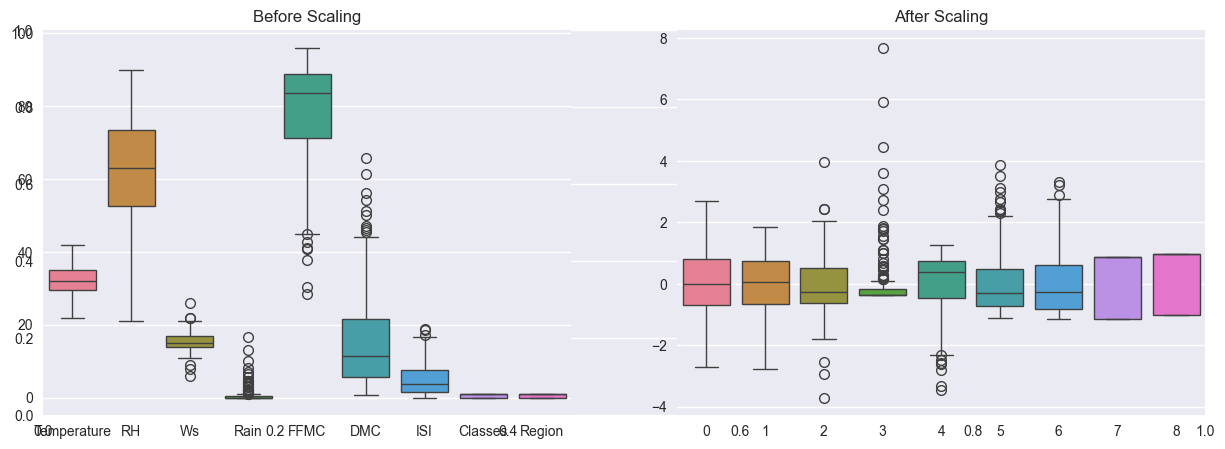

In [39]:
# Boxplot
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After Scaling")

plt.show()

## Model Training

In [40]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred1 = lin_reg.predict(X_test_scaled)

Mean Squared Error: 0.3511603478546566
Mean Absolute Error: 0.44460005315140283
Root Mean Squared Error: 0.5925878397796032
R2 Score: 0.9909903348704032
Adjusted R2 Score: 0.9889111813789578


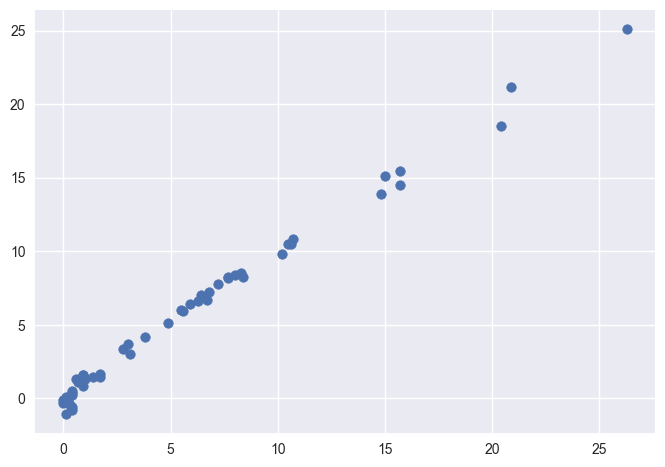

In [49]:
#Performance Metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_pred1))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred1))
# print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 Score:",r2_score(y_test,y_pred1))
adj_r2 = 1 - (1-r2_score(y_test,y_pred1)) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:",adj_r2)

plt.scatter(y_test,y_pred1)

In [50]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred2 = lasso.predict(X_test_scaled)

Mean Squared Error: 1.706480937881614
Mean Absolute Error: 0.983940077932534
Root Mean Squared Error: 1.3063234430575048
R2 Score: 0.9562170902999643
Adjusted R2 Score: 0.9461133419076483


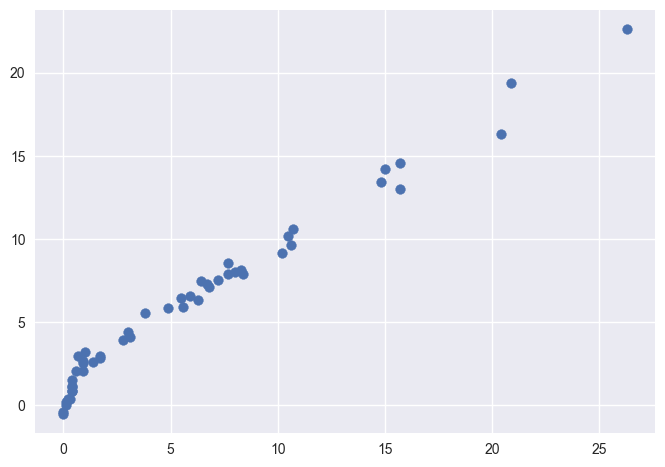

In [56]:
#Performance Metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_pred2))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred2))
# print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("R2 Score:",r2_score(y_test,y_pred2))
adj_r2 = 1 - (1-r2_score(y_test,y_pred2)) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:",adj_r2)

plt.scatter(y_test,y_pred2)

In [55]:
# Lasso CV
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred4 = lassocv.predict(X_test_scaled)

In [61]:
lassocv.alphas_

array([7.02174464, 6.54850255, 6.1071554 , 5.69555356, 5.31169231,
       4.95370203, 4.61983909, 4.3084774 , 4.01810044, 3.74729392,
       3.49473885, 3.25920515, 3.03954563, 2.83469043, 2.64364178,
       2.46546917, 2.2993048 , 2.14433935, 1.99981806, 1.86503701,
       1.73933976, 1.62211408, 1.51278902, 1.41083211, 1.31574674,
       1.22706982, 1.14436942, 1.06724275, 0.99531416, 0.92823332,
       0.8656735 , 0.80733   , 0.75291866, 0.70217446, 0.65485026,
       0.61071554, 0.56955536, 0.53116923, 0.4953702 , 0.46198391,
       0.43084774, 0.40181004, 0.37472939, 0.34947389, 0.32592052,
       0.30395456, 0.28346904, 0.26436418, 0.24654692, 0.22993048,
       0.21443394, 0.19998181, 0.1865037 , 0.17393398, 0.16221141,
       0.1512789 , 0.14108321, 0.13157467, 0.12270698, 0.11443694,
       0.10672427, 0.09953142, 0.09282333, 0.08656735, 0.080733  ,
       0.07529187, 0.07021745, 0.06548503, 0.06107155, 0.05695554,
       0.05311692, 0.04953702, 0.04619839, 0.04308477, 0.04018

Mean Squared Error: 0.36887494933722287
Mean Absolute Error: 0.47366400867100517
Root Mean Squared Error: 0.60735076301691
R2 Score: 0.9905358341608634
Adjusted R2 Score: 0.9883517958902934


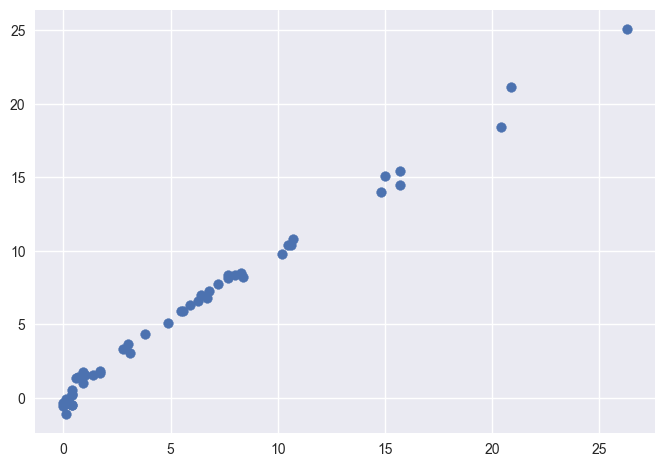

In [58]:
#Performance Metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_pred4))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred4))
# print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred4)))
print("R2 Score:",r2_score(y_test,y_pred4))
adj_r2 = 1 - (1-r2_score(y_test,y_pred4)) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:",adj_r2)

plt.scatter(y_test,y_pred4)

In [52]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred3 = ridge.predict(X_test_scaled)

Mean Squared Error: 0.3819765939797176
Mean Absolute Error: 0.4680716315815277
Root Mean Squared Error: 0.6180425502986971
R2 Score: 0.9901996873504476
Adjusted R2 Score: 0.9879380767390125


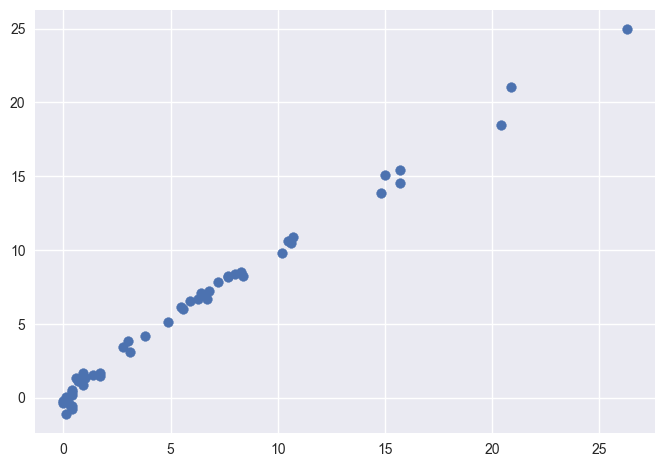

In [57]:
#Performance Metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_pred3))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred3))
# print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R2 Score:",r2_score(y_test,y_pred3))
adj_r2 = 1 - (1-r2_score(y_test,y_pred3)) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:",adj_r2)

plt.scatter(y_test,y_pred3)

In [62]:
#RidgeCV
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred5 = ridgecv.predict(X_test_scaled)

Mean Squared Error: 0.3819765939797176
Mean Absolute Error: 0.4680716315815277
Root Mean Squared Error: 0.6180425502986971
R2 Score: 0.9901996873504476
Adjusted R2 Score: 0.9879380767390125


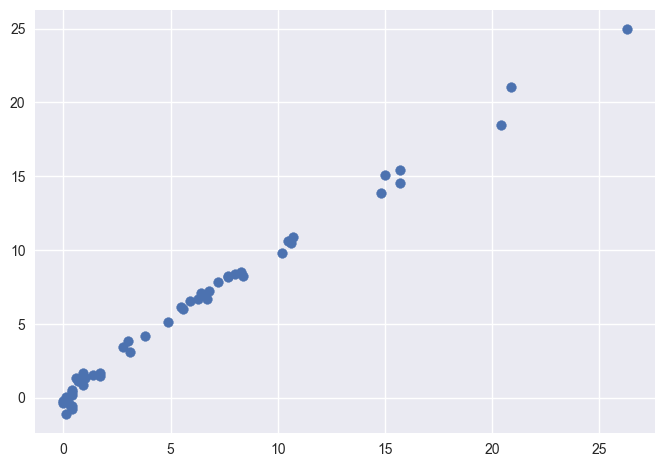

In [64]:
#Performance Metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_pred5))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred5))
# print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred5)))
print("R2 Score:",r2_score(y_test,y_pred5))
adj_r2 = 1 - (1-r2_score(y_test,y_pred5)) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:",adj_r2)

plt.scatter(y_test,y_pred5)

In [65]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [70]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('r'))